In [1]:
from mothernet.prediction.mothernet_additive import MotherNetAdditiveClassifier, MotherNetAdditiveRegressor

#model_path = "../models_diff/baam_Daverage_maxnumclasses0_nsamples500_numfeatures10_yencoderlinear_04_30_2024_17_02_37_epoch_10.cpkt"
#model_path = "../models_diff/baam_Daverage_l1e-05_maxnumclasses0_nsamples500_numfeatures10_yencoderlinear_05_01_2024_15_16_49_epoch_30.cpkt"
model_path = "../models_diff/baam_Daverage_l1e-05_maxnumclasses0_nsamples500_numfeatures10_yencoderlinear_05_08_2024_03_04_01_epoch_40.cpkt"
reg = MotherNetAdditiveRegressor(device='cpu', path=model_path)

In [22]:
from sklearn.datasets import load_iris, fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import pandas as pd

In [26]:
data = fetch_openml("Moneyball")
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)
prep = make_column_transformer((OrdinalEncoder(), X_train.dtypes == "category"), remainder='passthrough')
X_train_pre = prep.fit_transform(X_train)
ss = StandardScaler().fit(pd.DataFrame(y_train))
reg.fit(X_train_pre, ss.transform(pd.DataFrame(y_train)).ravel())
y_pred = reg.predict(prep.transform(X_test))
assert y_pred.shape[0] == X_test.shape[0]


/anaconda/envs/tabpfn_testing_environment/lib/python3.11/site-packages/sklearn/datasets/_openml.py:322: UserWarning:

Multiple active versions of the dataset matching the name moneyball exist. Versions may be fundamentally different, returning version 2. Available versions:
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=41021
- version 3, status: active
  url: https://www.openml.org/search?type=data&id=43720




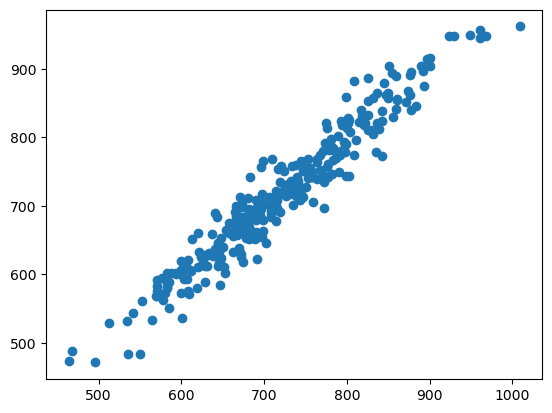

In [28]:
plt.plot(y_test, ss.inverse_transform(y_pred), 'o')

In [29]:
import interpret
interpret.show(reg.explain_global())

In [4]:
import numpy as np
rng = np.random.RandomState(3)
X = rng.normal(size=(400, 2))
y = X @ rng.normal(size=(2,))

In [5]:
reg.fit(X, y)

In [6]:
y_pred = reg.predict(X)

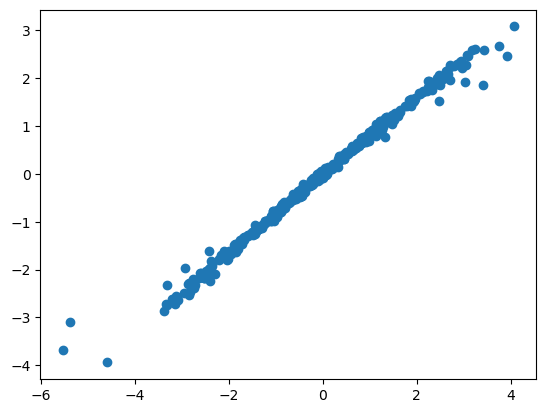

In [7]:
import matplotlib.pyplot as plt
plt.plot(y, y_pred, 'o')

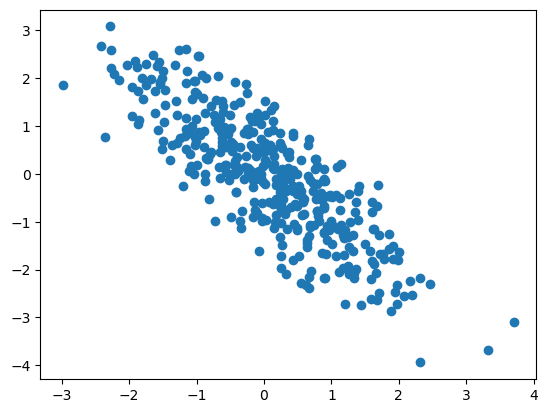

In [8]:
plt.plot(X[:, 1], y_pred, 'o')

In [14]:
import interpret
interpret.show(reg.explain_global())

In [1]:
from mothernet.model_configs import get_prior_config
import lightning as L
import torch
import pytest
import numpy as np

from mothernet.priors import ClassificationAdapterPrior, MLPPrior
from mothernet.priors.classification_adapter import ClassificationAdapter


batch_size = 1
num_features = 3
n_samples = 200
# test the mlp prior
L.seed_everything(42)
config = get_prior_config()
config['prior']['classification']['max_num_classes'] = 0
config['prior']['classification']['pad_zeros'] = False


Seed set to 42


In [2]:
adapter = ClassificationAdapter(MLPPrior(config['prior']['mlp']), config=config['prior']['classification'])
args = {'device': 'cpu', 'n_samples': n_samples, 'num_features': num_features}

x, y, y_ = adapter(batch_size=batch_size, **args)
x.shape, y.shape

(torch.Size([200, 1, 1]), torch.Size([200, 1]))

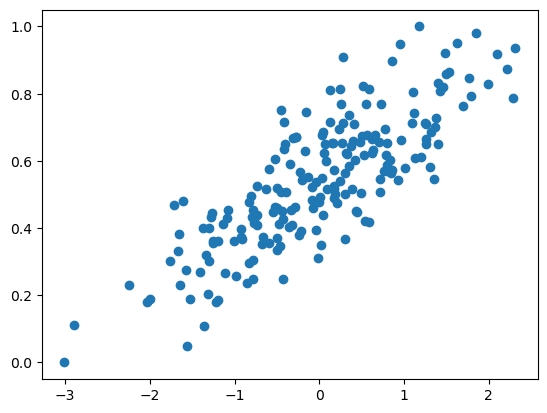

In [3]:
import matplotlib.pyplot as plt
plt.plot(x.squeeze(), y.ravel(), 'o')

In [4]:
x.mean()

tensor(-2.8610e-08)

In [5]:
x.std()

tensor(1.0000)

In [6]:
y.mean()

tensor(0.5430)

In [7]:
y.std()

tensor(0.1950)

In [8]:
y.min()

tensor(0.)

In [ ]:
y.max()